## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import baselineModels
import scrapbook as sb 
import torch 
import statsModel
import bostonDataset
import dataset 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split

## Import Dataset 
### Boston Dataset 

In [3]:
X,Y = bostonDataset.boston_data()
n_features = 13 
n_samples = 506 
n_target = 1 

        X1    X2    X3   X4     X5     X6    X7      X8   X9    X10   X11  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

      X12   X13     Y  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [4]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Stats Model 

No handles with labels found to put in legend.


                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.745
Model:                            OLS   Adj. R-squared (uncentered):              0.736
Method:                 Least Squares   F-statistic:                              87.70
Date:                Sat, 27 Nov 2021   Prob (F-statistic):                   3.86e-107
Time:                        10:43:35   Log-Likelihood:                         -305.64
No. Observations:                 404   AIC:                                      637.3
Df Residuals:                     391   BIC:                                      689.3
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

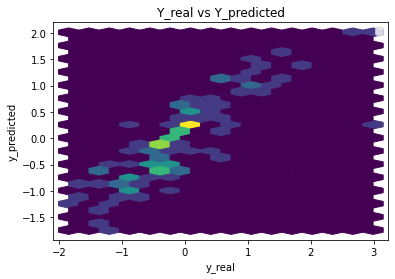

Performance Metrics
Mean Squared Error: 0.23747925439392012
Mean Absolute Error: 0.343779108608817
Manhattan distance: 35.06546907809933
Euclidean distance: 4.92167491289092


In [5]:
[coeff,y_pred] = statsModel.statsModel(X,Y)

#Store Coefficients 
sb.glue("Coefficients",coeff)

## Random Forest 

In [6]:
mse_rf = baselineModels.randomForest(X_train,y_train,X_test,y_test)
#Store MSE Value
sb.glue("Random Forest MSE",mse_rf)

Mean Squared error 0.19844541688275663


## Catboost 



In [7]:
mse_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)
#Store MSE Value 
sb.glue("Catboost MSE",mse_cb)

Learning rate set to 0.033215


0:	learn: 0.9935736	total: 58.7ms	remaining: 58.6s
1:	learn: 0.9725194	total: 59.8ms	remaining: 29.8s
2:	learn: 0.9530501	total: 60.7ms	remaining: 20.2s
3:	learn: 0.9363934	total: 61.8ms	remaining: 15.4s
4:	learn: 0.9187489	total: 62.7ms	remaining: 12.5s
5:	learn: 0.9034073	total: 63.7ms	remaining: 10.5s
6:	learn: 0.8868021	total: 64.5ms	remaining: 9.15s
7:	learn: 0.8712088	total: 65.4ms	remaining: 8.11s
8:	learn: 0.8560018	total: 66.3ms	remaining: 7.3s
9:	learn: 0.8393663	total: 67.3ms	remaining: 6.66s
10:	learn: 0.8241126	total: 68.2ms	remaining: 6.13s
11:	learn: 0.8089098	total: 69ms	remaining: 5.68s
12:	learn: 0.7942160	total: 70ms	remaining: 5.31s
13:	learn: 0.7793504	total: 70.9ms	remaining: 5s
14:	learn: 0.7668521	total: 71.8ms	remaining: 4.72s
15:	learn: 0.7527196	total: 72.7ms	remaining: 4.47s
16:	learn: 0.7414773	total: 73.5ms	remaining: 4.25s
17:	learn: 0.7281020	total: 74.4ms	remaining: 4.06s
18:	learn: 0.7163031	total: 75.2ms	remaining: 3.88s
19:	learn: 0.7029718	total: 76

122:	learn: 0.2838271	total: 159ms	remaining: 1.14s
123:	learn: 0.2819706	total: 160ms	remaining: 1.13s
124:	learn: 0.2806227	total: 161ms	remaining: 1.13s
125:	learn: 0.2791478	total: 162ms	remaining: 1.12s
126:	learn: 0.2776296	total: 163ms	remaining: 1.12s
127:	learn: 0.2768358	total: 163ms	remaining: 1.11s
128:	learn: 0.2755555	total: 164ms	remaining: 1.11s
129:	learn: 0.2747128	total: 165ms	remaining: 1.1s
130:	learn: 0.2736555	total: 166ms	remaining: 1.1s
131:	learn: 0.2726927	total: 167ms	remaining: 1.1s
132:	learn: 0.2715471	total: 168ms	remaining: 1.09s
133:	learn: 0.2708084	total: 169ms	remaining: 1.09s
134:	learn: 0.2700372	total: 169ms	remaining: 1.08s
135:	learn: 0.2688746	total: 170ms	remaining: 1.08s
136:	learn: 0.2678335	total: 171ms	remaining: 1.08s
137:	learn: 0.2670704	total: 172ms	remaining: 1.07s
138:	learn: 0.2661096	total: 173ms	remaining: 1.07s
139:	learn: 0.2652947	total: 173ms	remaining: 1.06s
140:	learn: 0.2643839	total: 174ms	remaining: 1.06s
141:	learn: 0.2

161:	learn: 0.2471349	total: 192ms	remaining: 991ms
162:	learn: 0.2466964	total: 193ms	remaining: 989ms
163:	learn: 0.2458831	total: 193ms	remaining: 986ms
164:	learn: 0.2451953	total: 194ms	remaining: 983ms
165:	learn: 0.2443986	total: 195ms	remaining: 980ms
166:	learn: 0.2439126	total: 196ms	remaining: 977ms
167:	learn: 0.2430794	total: 197ms	remaining: 974ms
168:	learn: 0.2425808	total: 198ms	remaining: 971ms
169:	learn: 0.2420616	total: 199ms	remaining: 972ms
170:	learn: 0.2414981	total: 200ms	remaining: 969ms
171:	learn: 0.2410201	total: 201ms	remaining: 966ms
172:	learn: 0.2403214	total: 201ms	remaining: 962ms
173:	learn: 0.2397565	total: 202ms	remaining: 959ms
174:	learn: 0.2392630	total: 203ms	remaining: 957ms
175:	learn: 0.2383608	total: 204ms	remaining: 954ms
176:	learn: 0.2376973	total: 204ms	remaining: 951ms
177:	learn: 0.2370624	total: 205ms	remaining: 948ms
178:	learn: 0.2364603	total: 206ms	remaining: 945ms
179:	learn: 0.2357885	total: 207ms	remaining: 942ms
180:	learn: 

231:	learn: 0.2073309	total: 249ms	remaining: 823ms
232:	learn: 0.2070747	total: 249ms	remaining: 821ms
233:	learn: 0.2068264	total: 250ms	remaining: 819ms
234:	learn: 0.2063418	total: 251ms	remaining: 817ms
235:	learn: 0.2060706	total: 252ms	remaining: 815ms
236:	learn: 0.2055950	total: 253ms	remaining: 813ms
237:	learn: 0.2051397	total: 253ms	remaining: 812ms
238:	learn: 0.2047212	total: 254ms	remaining: 810ms
239:	learn: 0.2042662	total: 255ms	remaining: 808ms
240:	learn: 0.2040225	total: 256ms	remaining: 806ms
241:	learn: 0.2035290	total: 257ms	remaining: 804ms
242:	learn: 0.2030215	total: 258ms	remaining: 802ms
243:	learn: 0.2027198	total: 258ms	remaining: 801ms
244:	learn: 0.2022255	total: 259ms	remaining: 799ms
245:	learn: 0.2019044	total: 260ms	remaining: 797ms
246:	learn: 0.2011697	total: 261ms	remaining: 795ms
247:	learn: 0.2005284	total: 261ms	remaining: 793ms
248:	learn: 0.2001590	total: 262ms	remaining: 791ms
249:	learn: 0.1998859	total: 263ms	remaining: 789ms
250:	learn: 

356:	learn: 0.1611572	total: 350ms	remaining: 630ms
357:	learn: 0.1607090	total: 351ms	remaining: 629ms
358:	learn: 0.1604722	total: 352ms	remaining: 628ms
359:	learn: 0.1600457	total: 352ms	remaining: 626ms
360:	learn: 0.1596140	total: 353ms	remaining: 625ms
361:	learn: 0.1591949	total: 354ms	remaining: 624ms
362:	learn: 0.1587799	total: 355ms	remaining: 623ms
363:	learn: 0.1585193	total: 356ms	remaining: 621ms
364:	learn: 0.1582399	total: 356ms	remaining: 620ms
365:	learn: 0.1578236	total: 357ms	remaining: 619ms
366:	learn: 0.1576256	total: 358ms	remaining: 618ms
367:	learn: 0.1572313	total: 359ms	remaining: 616ms
368:	learn: 0.1569030	total: 360ms	remaining: 615ms
369:	learn: 0.1566372	total: 361ms	remaining: 614ms
370:	learn: 0.1561350	total: 362ms	remaining: 613ms
371:	learn: 0.1559723	total: 362ms	remaining: 612ms
372:	learn: 0.1557593	total: 363ms	remaining: 610ms
373:	learn: 0.1555759	total: 364ms	remaining: 609ms
374:	learn: 0.1553534	total: 365ms	remaining: 608ms
375:	learn: 

393:	learn: 0.1499384	total: 382ms	remaining: 587ms
394:	learn: 0.1498118	total: 383ms	remaining: 586ms
395:	learn: 0.1493844	total: 383ms	remaining: 585ms
396:	learn: 0.1490772	total: 384ms	remaining: 584ms
397:	learn: 0.1487078	total: 385ms	remaining: 582ms
398:	learn: 0.1485281	total: 386ms	remaining: 581ms
399:	learn: 0.1482725	total: 387ms	remaining: 580ms
400:	learn: 0.1479364	total: 387ms	remaining: 579ms
401:	learn: 0.1474956	total: 388ms	remaining: 578ms
402:	learn: 0.1471013	total: 389ms	remaining: 576ms
403:	learn: 0.1467473	total: 390ms	remaining: 575ms
404:	learn: 0.1465457	total: 391ms	remaining: 574ms
405:	learn: 0.1461484	total: 392ms	remaining: 573ms
406:	learn: 0.1459413	total: 392ms	remaining: 572ms
407:	learn: 0.1455506	total: 393ms	remaining: 570ms
408:	learn: 0.1452349	total: 394ms	remaining: 569ms
409:	learn: 0.1450850	total: 395ms	remaining: 568ms
410:	learn: 0.1449005	total: 396ms	remaining: 567ms
411:	learn: 0.1446761	total: 396ms	remaining: 566ms
412:	learn: 

463:	learn: 0.1326775	total: 439ms	remaining: 508ms
464:	learn: 0.1324890	total: 440ms	remaining: 507ms
465:	learn: 0.1322532	total: 441ms	remaining: 506ms
466:	learn: 0.1320861	total: 442ms	remaining: 504ms
467:	learn: 0.1319330	total: 443ms	remaining: 503ms
468:	learn: 0.1318842	total: 444ms	remaining: 502ms
469:	learn: 0.1315090	total: 444ms	remaining: 501ms
470:	learn: 0.1312764	total: 445ms	remaining: 500ms
471:	learn: 0.1310851	total: 447ms	remaining: 500ms
472:	learn: 0.1307462	total: 447ms	remaining: 498ms
473:	learn: 0.1305854	total: 448ms	remaining: 497ms
474:	learn: 0.1305335	total: 449ms	remaining: 496ms
475:	learn: 0.1303481	total: 450ms	remaining: 495ms
476:	learn: 0.1299791	total: 451ms	remaining: 494ms
477:	learn: 0.1295566	total: 451ms	remaining: 493ms
478:	learn: 0.1293882	total: 452ms	remaining: 492ms
479:	learn: 0.1291196	total: 453ms	remaining: 491ms
480:	learn: 0.1287964	total: 454ms	remaining: 490ms
481:	learn: 0.1287577	total: 455ms	remaining: 489ms
482:	learn: 

586:	learn: 0.1075248	total: 540ms	remaining: 380ms
587:	learn: 0.1072726	total: 541ms	remaining: 379ms
588:	learn: 0.1069714	total: 542ms	remaining: 378ms
589:	learn: 0.1067619	total: 542ms	remaining: 377ms
590:	learn: 0.1067351	total: 543ms	remaining: 376ms
591:	learn: 0.1065220	total: 544ms	remaining: 375ms
592:	learn: 0.1064937	total: 545ms	remaining: 374ms
593:	learn: 0.1063082	total: 546ms	remaining: 373ms
594:	learn: 0.1060773	total: 547ms	remaining: 372ms
595:	learn: 0.1058529	total: 547ms	remaining: 371ms
596:	learn: 0.1058064	total: 548ms	remaining: 370ms
597:	learn: 0.1056679	total: 549ms	remaining: 369ms
598:	learn: 0.1054692	total: 550ms	remaining: 368ms
599:	learn: 0.1053717	total: 551ms	remaining: 367ms
600:	learn: 0.1053467	total: 552ms	remaining: 366ms
601:	learn: 0.1050759	total: 552ms	remaining: 365ms
602:	learn: 0.1049061	total: 553ms	remaining: 364ms
603:	learn: 0.1047248	total: 554ms	remaining: 363ms
604:	learn: 0.1044506	total: 555ms	remaining: 362ms
605:	learn: 

625:	learn: 0.1007341	total: 572ms	remaining: 342ms
626:	learn: 0.1004978	total: 573ms	remaining: 341ms
627:	learn: 0.1003791	total: 573ms	remaining: 340ms
628:	learn: 0.1002186	total: 574ms	remaining: 339ms
629:	learn: 0.1000536	total: 575ms	remaining: 338ms
630:	learn: 0.0998741	total: 576ms	remaining: 337ms
631:	learn: 0.0997207	total: 577ms	remaining: 336ms
632:	learn: 0.0995037	total: 577ms	remaining: 335ms
633:	learn: 0.0993528	total: 578ms	remaining: 334ms
634:	learn: 0.0992168	total: 579ms	remaining: 333ms
635:	learn: 0.0990476	total: 580ms	remaining: 332ms
636:	learn: 0.0989665	total: 581ms	remaining: 331ms
637:	learn: 0.0987371	total: 581ms	remaining: 330ms
638:	learn: 0.0985211	total: 582ms	remaining: 329ms
639:	learn: 0.0984043	total: 583ms	remaining: 328ms
640:	learn: 0.0983642	total: 584ms	remaining: 327ms
641:	learn: 0.0982828	total: 585ms	remaining: 326ms
642:	learn: 0.0981950	total: 585ms	remaining: 325ms
643:	learn: 0.0980195	total: 586ms	remaining: 324ms
644:	learn: 

694:	learn: 0.0903037	total: 630ms	remaining: 277ms
695:	learn: 0.0902844	total: 631ms	remaining: 276ms
696:	learn: 0.0901571	total: 632ms	remaining: 275ms
697:	learn: 0.0899957	total: 633ms	remaining: 274ms
698:	learn: 0.0898470	total: 634ms	remaining: 273ms
699:	learn: 0.0897598	total: 635ms	remaining: 272ms
700:	learn: 0.0896261	total: 635ms	remaining: 271ms
701:	learn: 0.0895480	total: 636ms	remaining: 270ms
702:	learn: 0.0894381	total: 637ms	remaining: 269ms
703:	learn: 0.0893507	total: 638ms	remaining: 268ms
704:	learn: 0.0893027	total: 639ms	remaining: 267ms
705:	learn: 0.0890572	total: 640ms	remaining: 266ms
706:	learn: 0.0890393	total: 641ms	remaining: 265ms
707:	learn: 0.0889487	total: 641ms	remaining: 264ms
708:	learn: 0.0888306	total: 642ms	remaining: 264ms
709:	learn: 0.0886779	total: 643ms	remaining: 263ms
710:	learn: 0.0884579	total: 644ms	remaining: 262ms
711:	learn: 0.0883742	total: 644ms	remaining: 261ms
712:	learn: 0.0882907	total: 645ms	remaining: 260ms
713:	learn: 

818:	learn: 0.0760872	total: 730ms	remaining: 161ms
819:	learn: 0.0760038	total: 731ms	remaining: 161ms
820:	learn: 0.0758649	total: 732ms	remaining: 160ms
821:	learn: 0.0756992	total: 733ms	remaining: 159ms
822:	learn: 0.0756638	total: 734ms	remaining: 158ms
823:	learn: 0.0755537	total: 735ms	remaining: 157ms
824:	learn: 0.0755436	total: 735ms	remaining: 156ms
825:	learn: 0.0754176	total: 736ms	remaining: 155ms
826:	learn: 0.0753819	total: 737ms	remaining: 154ms
827:	learn: 0.0751946	total: 738ms	remaining: 153ms
828:	learn: 0.0750848	total: 739ms	remaining: 152ms
829:	learn: 0.0749791	total: 739ms	remaining: 151ms
830:	learn: 0.0749019	total: 740ms	remaining: 151ms
831:	learn: 0.0747881	total: 741ms	remaining: 150ms
832:	learn: 0.0747793	total: 742ms	remaining: 149ms
833:	learn: 0.0746662	total: 743ms	remaining: 148ms
834:	learn: 0.0745784	total: 743ms	remaining: 147ms
835:	learn: 0.0743768	total: 744ms	remaining: 146ms
836:	learn: 0.0742909	total: 745ms	remaining: 145ms
837:	learn: 

857:	learn: 0.0722058	total: 763ms	remaining: 126ms
858:	learn: 0.0721903	total: 764ms	remaining: 125ms
859:	learn: 0.0721244	total: 765ms	remaining: 124ms
860:	learn: 0.0720409	total: 765ms	remaining: 124ms
861:	learn: 0.0719936	total: 766ms	remaining: 123ms
862:	learn: 0.0719051	total: 767ms	remaining: 122ms
863:	learn: 0.0718089	total: 768ms	remaining: 121ms
864:	learn: 0.0717242	total: 769ms	remaining: 120ms
865:	learn: 0.0715839	total: 769ms	remaining: 119ms
866:	learn: 0.0715670	total: 770ms	remaining: 118ms
867:	learn: 0.0715574	total: 771ms	remaining: 117ms
868:	learn: 0.0714750	total: 772ms	remaining: 116ms
869:	learn: 0.0713919	total: 773ms	remaining: 115ms
870:	learn: 0.0712492	total: 774ms	remaining: 115ms
871:	learn: 0.0711179	total: 774ms	remaining: 114ms
872:	learn: 0.0710880	total: 775ms	remaining: 113ms
873:	learn: 0.0708845	total: 776ms	remaining: 112ms
874:	learn: 0.0707872	total: 777ms	remaining: 111ms
875:	learn: 0.0706390	total: 778ms	remaining: 110ms
876:	learn: 

927:	learn: 0.0661565	total: 821ms	remaining: 63.7ms
928:	learn: 0.0660386	total: 822ms	remaining: 62.8ms
929:	learn: 0.0659574	total: 823ms	remaining: 61.9ms
930:	learn: 0.0658990	total: 823ms	remaining: 61ms
931:	learn: 0.0657367	total: 824ms	remaining: 60.2ms
932:	learn: 0.0656465	total: 825ms	remaining: 59.3ms
933:	learn: 0.0655511	total: 826ms	remaining: 58.4ms
934:	learn: 0.0654546	total: 827ms	remaining: 57.5ms
935:	learn: 0.0654451	total: 827ms	remaining: 56.6ms
936:	learn: 0.0653544	total: 828ms	remaining: 55.7ms
937:	learn: 0.0653336	total: 829ms	remaining: 54.8ms
938:	learn: 0.0651845	total: 830ms	remaining: 53.9ms
939:	learn: 0.0650528	total: 831ms	remaining: 53ms
940:	learn: 0.0649700	total: 831ms	remaining: 52.1ms
941:	learn: 0.0648682	total: 832ms	remaining: 51.2ms
942:	learn: 0.0647582	total: 833ms	remaining: 50.3ms
943:	learn: 0.0646880	total: 834ms	remaining: 49.4ms
944:	learn: 0.0646121	total: 834ms	remaining: 48.6ms
945:	learn: 0.0645062	total: 835ms	remaining: 47.7

## Vanilla Neural Network 

In [8]:
# Parameters 
n_epochs = 5000
batch_size = 100
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
baselineModels.vanillaNeuralNetwork(train_data,test_data,batch_size,n_features,n_target,n_epochs)

Mean Squared error 0.9726366473188403
